# Mini batch gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [42]:
# The class for plotting the diagrams

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Data Space Iteration: '+ str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [43]:
import torch
torch.manual_seed(1)

In [44]:
x = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * x - 1
y = f + 0.1 * torch.randn(x.size())

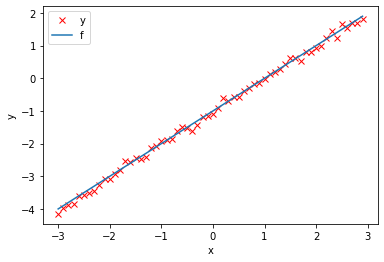

In [45]:
plt.plot(x.numpy(), y.numpy(), 'rx', label = 'y')
plt.plot(x.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [46]:
def forward(x):
    return w * x + b

In [47]:
def criterion(y_hat, y):
    return torch.mean((y_hat - y)**2)

<Figure size 432x288 with 0 Axes>

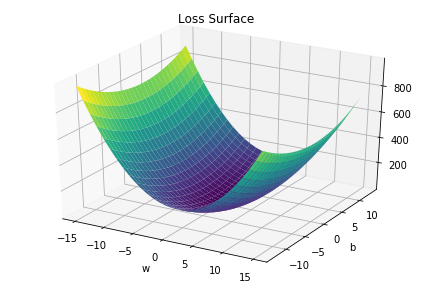

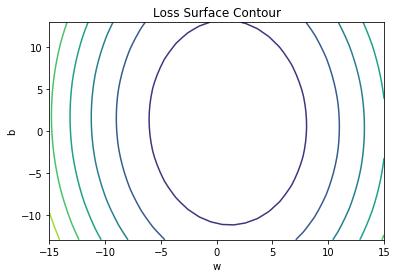

In [48]:
get_surface = plot_error_surfaces(15, 13, x, y, 30)

In [49]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.1
loss_bgd = []

def train_model_bgd(epochs):
    for epoch in range(epochs):
        y_hat = forward(x)
        loss = criterion(y_hat, y)
        loss_bgd.append(loss)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
        loss.backward()
        w.data -= lr * w.grad.data
        b.data -= lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

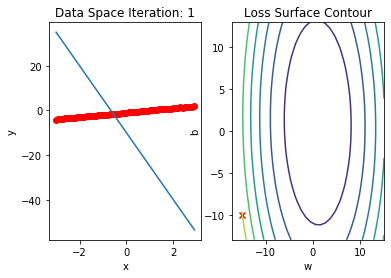

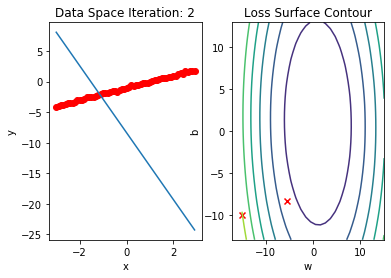

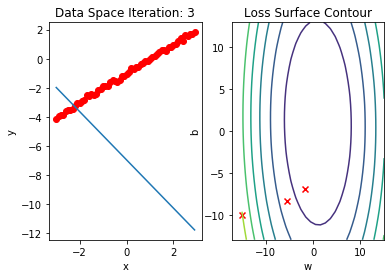

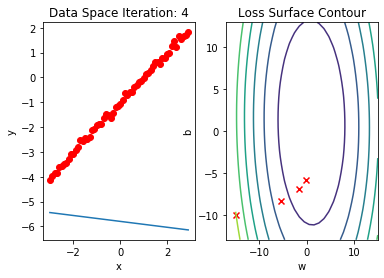

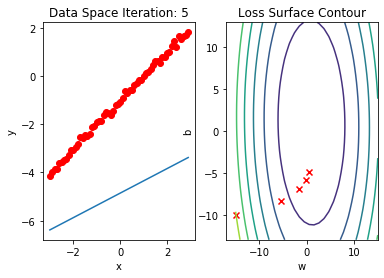

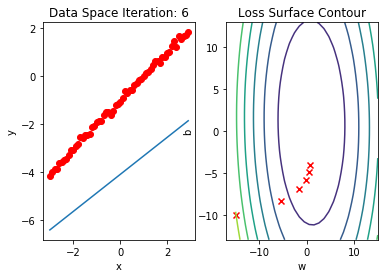

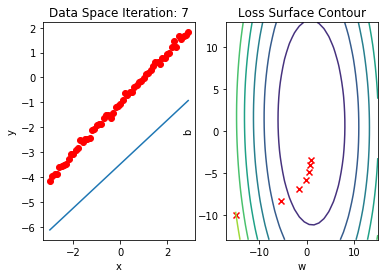

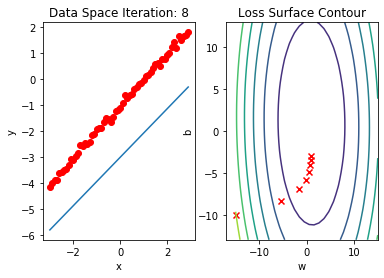

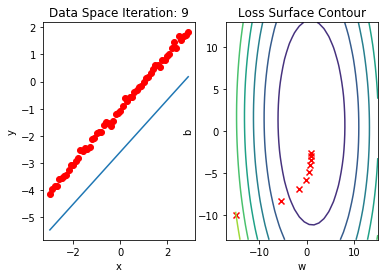

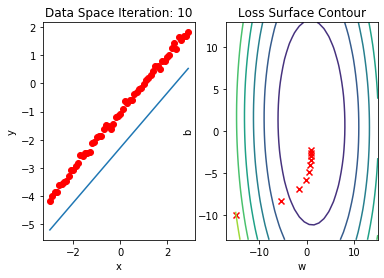

In [50]:
train_model_bgd(10)

In [51]:
get_surface = plot_error_surfaces(15, 13, x, y, 30, go = False)

In [55]:
from torch.utils.data import Dataset, DataLoader

In [56]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * x - 1
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [58]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [69]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
loss_sgd = []
lr = 0.1
def train_model_sgd(epochs, x, y):
    for epoch in range(epochs):
        y_hat = forward(x)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(y_hat, y).tolist())
        get_surface.plot_ps()
        loss_sgd.append(criterion(forward(x), y).tolist())
        for x, y in trainloader:
            y_hat = forward(x)
            loss = criterion(y_hat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data -= lr * w.grad.data
            b.data -= lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()

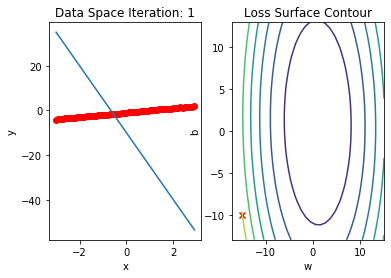

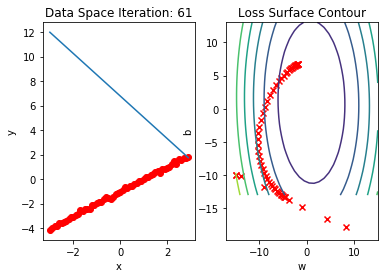

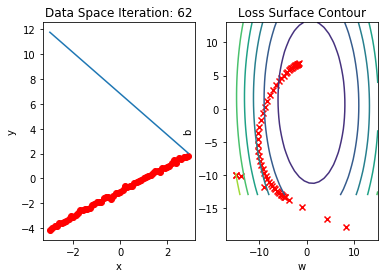

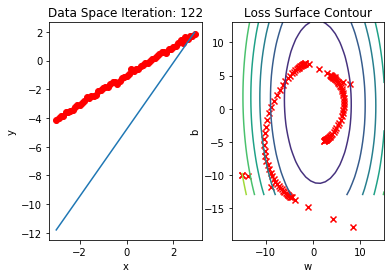

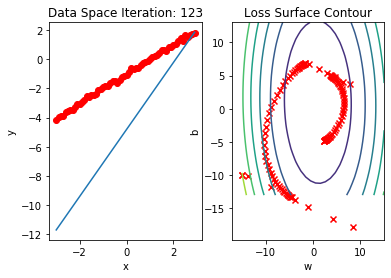

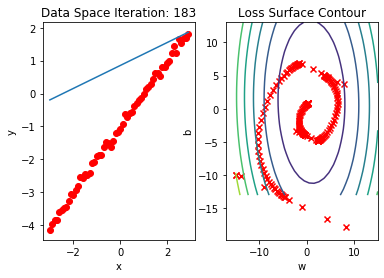

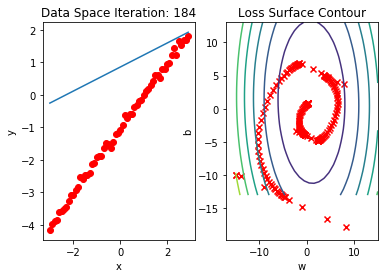

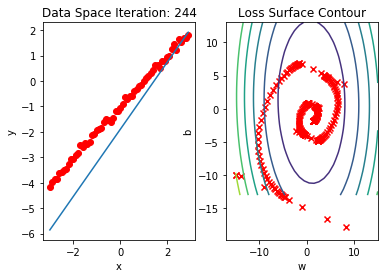

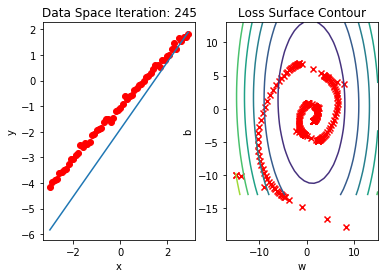

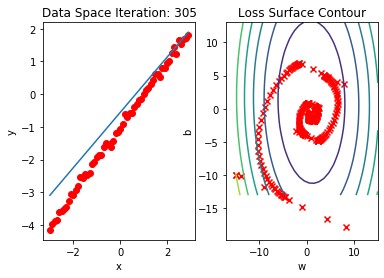

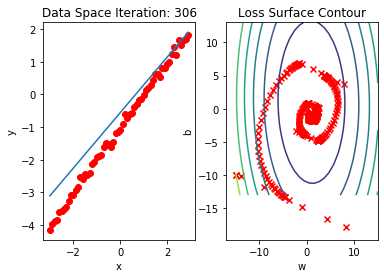

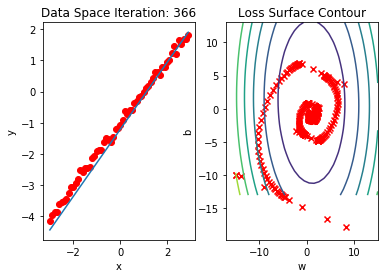

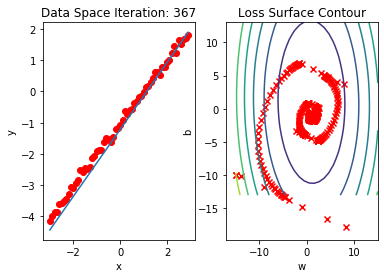

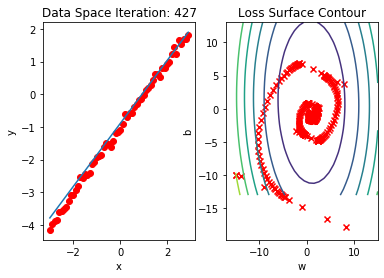

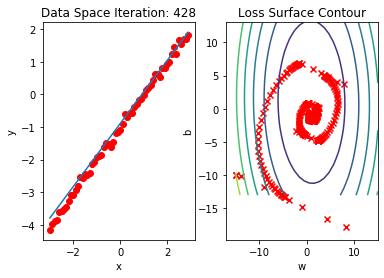

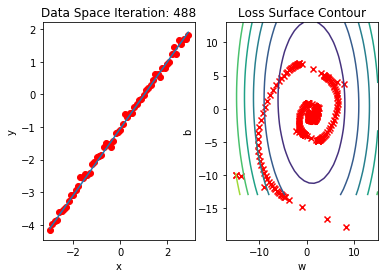

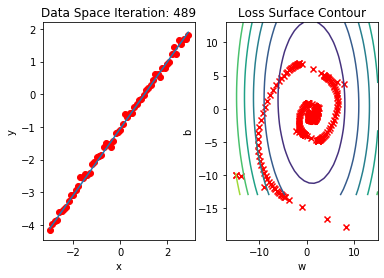

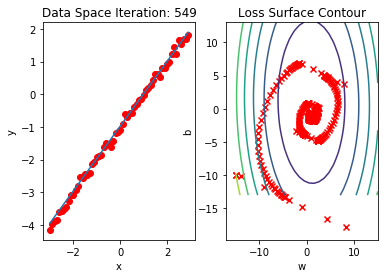

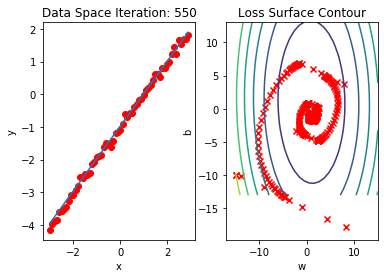

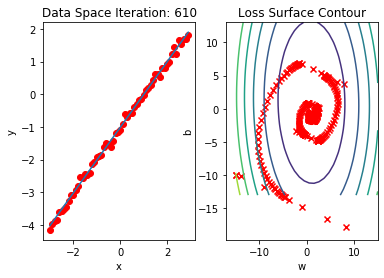

In [70]:
train_model_sgd(10, x, y)

In [71]:
get_surface = plot_error_surfaces(15, 13, x, y, 30, go = False)

In [72]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 5)

In [73]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [78]:
loss_mini5 = []
lr = 0.1

def train_model_mini5(epochs, x, y):
    for epoch in range(epochs):
        y_hat = forward(x)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(y_hat, y).tolist())
        get_surface.plot_ps()
        loss_mini5.append(criterion(forward(x), y).tolist())
        for x, y in trainloader:
            y_hat = forward(x)
            loss = criterion(y_hat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data -= lr * w.grad.data
            b.data -= lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

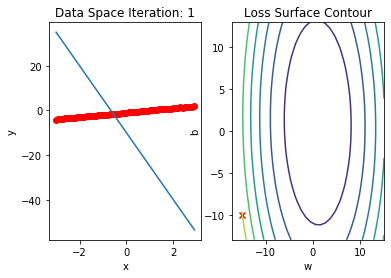

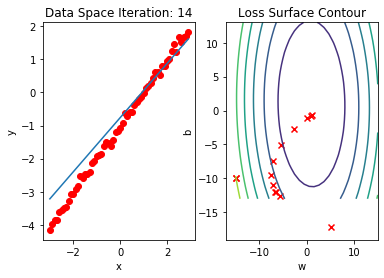

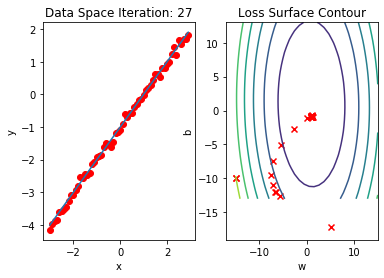

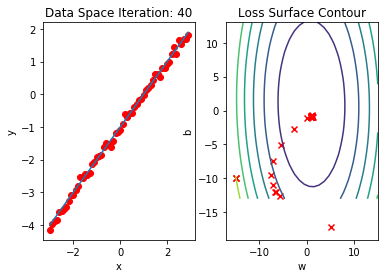

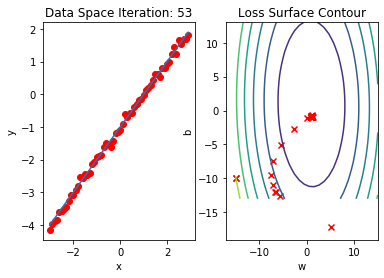

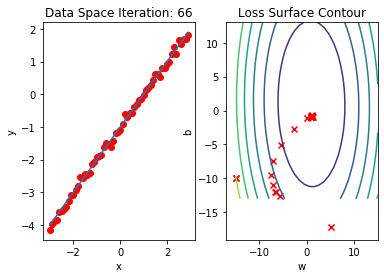

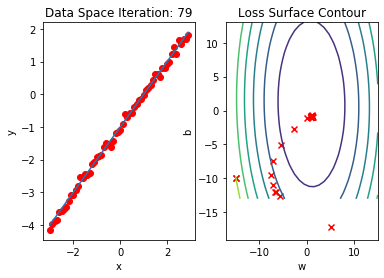

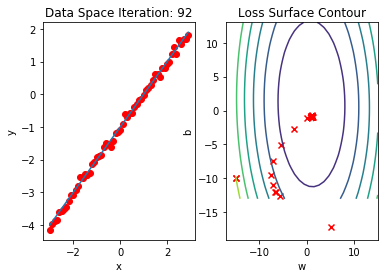

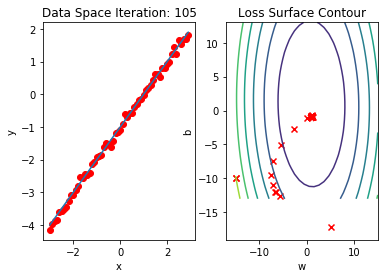

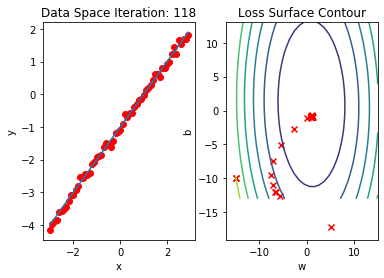

In [79]:
train_model_mini5(10, x, y)

In [80]:
get_surfaces = plot_error_surfaces(15, 13, x, y, 30, go = False)

In [81]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 10)

In [88]:
# Define train_model_Mini5 function

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI10 = []
lr = 0.1

def train_model_mini10(epochs, x, y):
    for epoch in range(epochs):
        Yhat = forward(x)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, y).tolist())
        get_surface.plot_ps()
        LOSS_MINI10.append(criterion(forward(x),y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

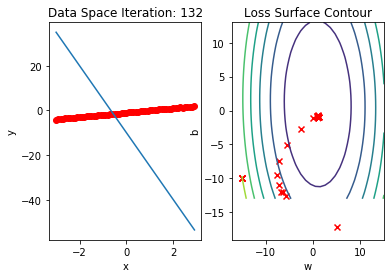

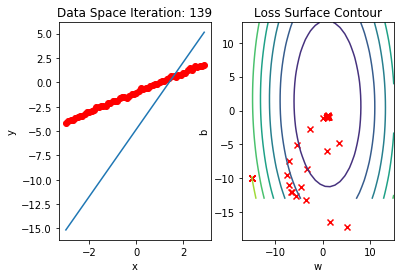

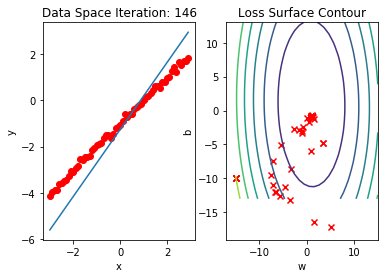

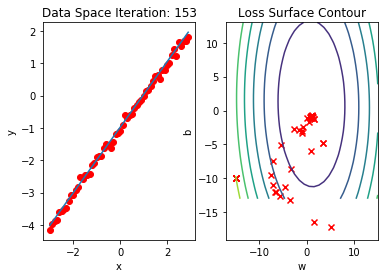

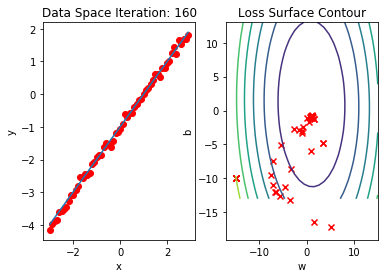

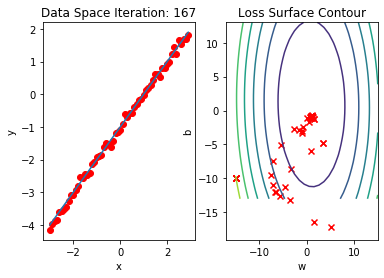

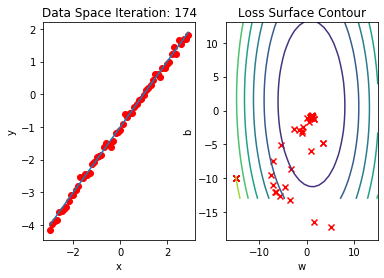

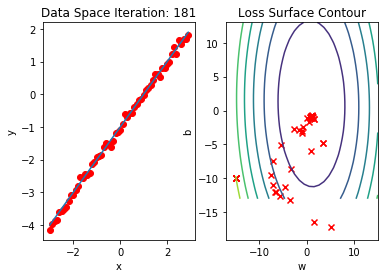

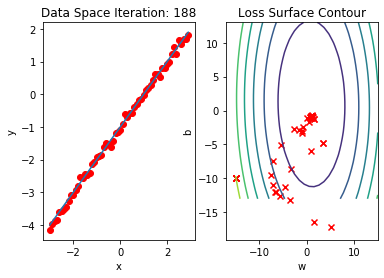

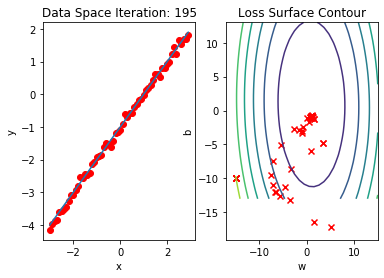

In [89]:
train_model_mini10(10, x, y)

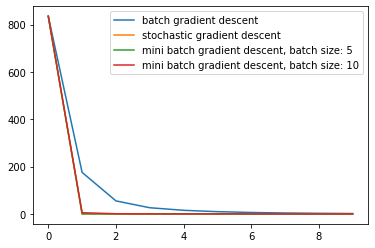

In [90]:
plt.plot(loss_bgd, label = 'batch gradient descent')
plt.plot(loss_sgd, label = 'stochastic gradient descent')
plt.plot(loss_mini5, label = 'mini batch gradient descent, batch size: 5')
plt.plot(LOSS_MINI10, label = 'mini batch gradient descent, batch size: 10')
plt.legend()

In [91]:
loss_20 = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.1

def train_model_(epochs, x, y):
    for epoch in range(epochs):
        Yhat = forward(x)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, y).tolist())
        get_surface.plot_ps()
        loss_20.append(criterion(forward(x),y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

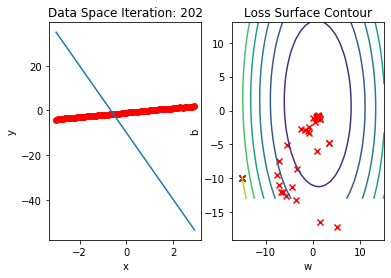

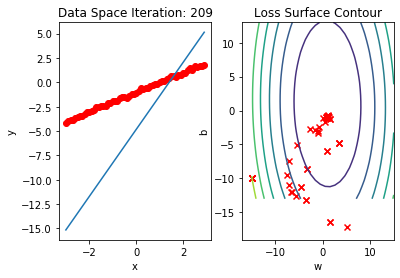

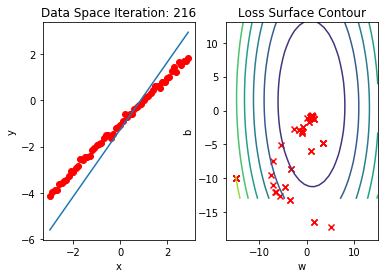

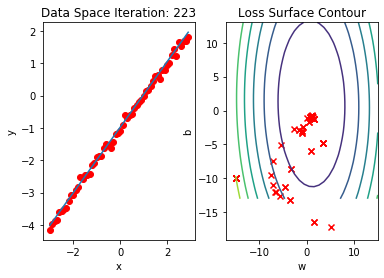

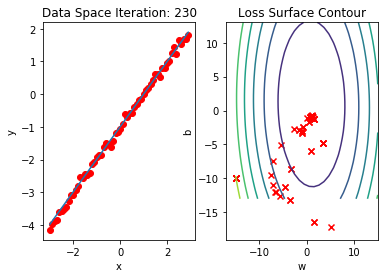

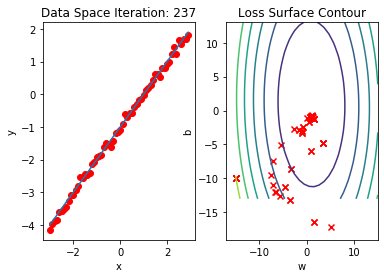

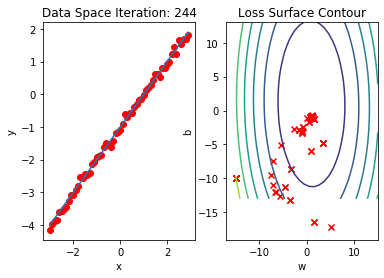

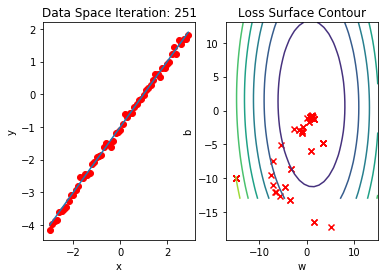

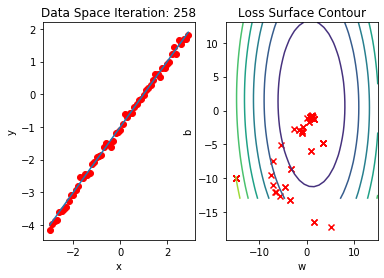

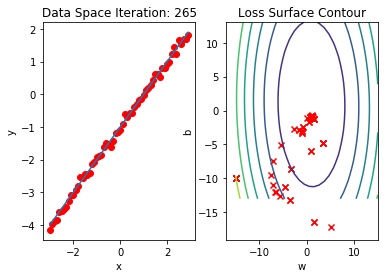

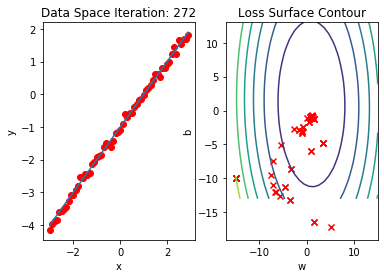

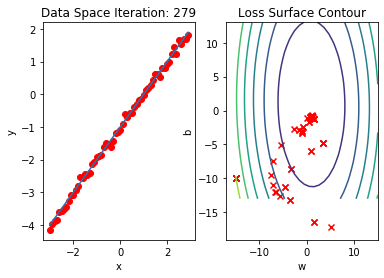

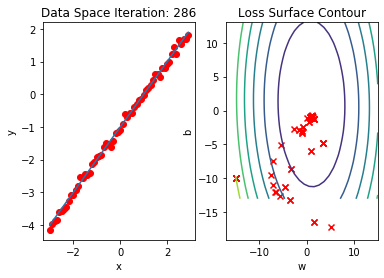

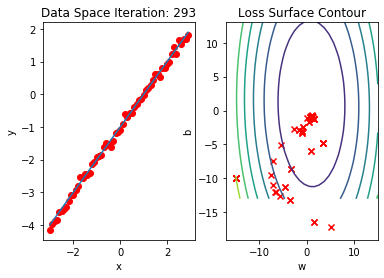

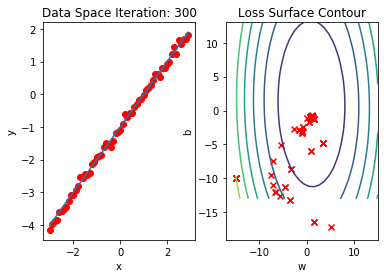

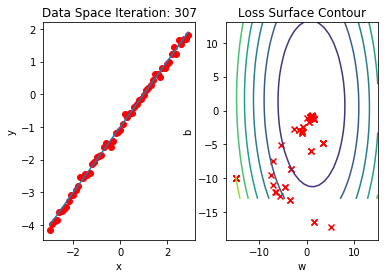

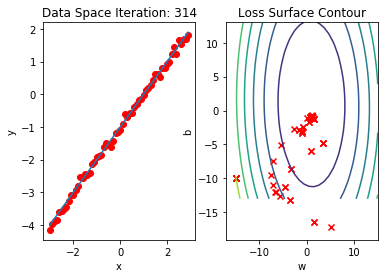

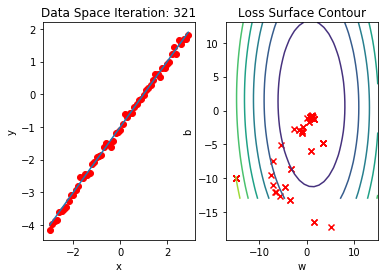

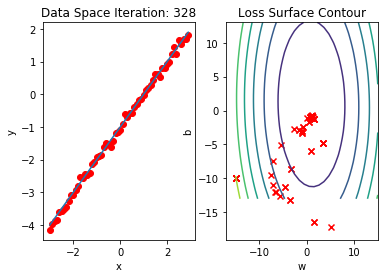

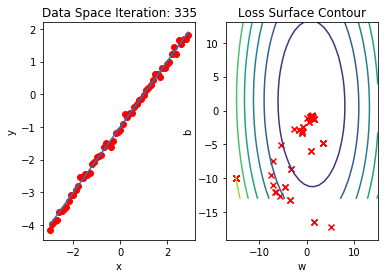

In [92]:
train_model_(20, x, y)

In [ ]:
plt.plot(loss_)